# **Happiness Score Prediction**

*Created by Ade Dwi Aryani*

# 1. Introduction

The Happiness Index or also known as the Index of Happiness is one of the indicators used to measure people's welfare based on the level of community happiness. One index that measures happiness is the happiness score. Various studies related to happiness show the phenomenon that the happiness of the population will have a significant effect on the success of development and social development in society (Forgeard et al., 2011).

The objective of the analysis is to predict the happiness score with related factors and by using the best model.

The dataset that will be used is the *World Happiness Report* data, which is downloaded from [Kaggle](https://www.kaggle.com/ajaypalsinghlo/world-happiness-report-2021). *World Happiness Report* is data from the Gallup World Poll. This data set consists of about 155 countries for each year, where in this analysis the years that will be used are the years 2006-2020.

Happiness score is the national average of responses to key life evaluation questions posed in the Gallup World Poll (GWP), which uses the Cantril Ladder. Happiness score is explained by the following factors:

- Country : Name of the country.
- Region : Region is region the country belongs to.
- GDP per capita: GDP per capita is in terms of Purchasing Power Parity (PPP) adjusted to constant 2011 international dollars, taken from the World Development Indicators (WDI) released by the World Bank on November 14, 2018.
- Healthy Life Expectancy: The time series of healthy life expectancy at birth are constructed based on data from the World Health Organization (WHO) Global Health Observatory data repository, with data available for 2005, 2010, 2015, and 2016. 
- Social support : the national average of the binary responses (either 0 or 1) to the Gallup World Poll (GWP) question “If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?”
- Freedom to make life choices is the national average of binary responses to the GWP question “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?”
- Generosity : the residual of regressing the national average of GWP responses to the question “Have you donated money to a charity in the past month?” on GDP per capita.
- Perceptions of corruption : the average of binary answers to two GWP questions: “Is corruption widespread throughout the government or not?” and “Is corruption widespread within businesses or not?” Where data for government corruption are missing, the perception of business corruption is used as the overall corruption-perception measure.

The models to be used are:
1. Linear Regression
2. Ridge Regression
3. Lasso Regression
4. K-Neighbors Regression
5. XG Boost Regression.

Of the five models, hyperparameter tuning will be carried out, and the best model will be chosen to predict the value of a country's happiness.

# 2. Import Libraries

Before starting to process data using Python, various libraries or *libraries* are needed that can simplify the process. The required library must match the data, models, and methods used in the analysis. The libraries needed to perform this analysis are:

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('ticks')
palette = sns.color_palette('mako')
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

# For Preprocessing
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# For Regression Problems
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# For Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
from sklearn.tree import export_text

# For Model Saving
import pickle

# 3. Data Loading

Data loading is done after the library import is complete. If the import went well, then adopt the data set by using `.read_csv()`.

In [2]:
# Import and Load Data
data = pd.read_csv('world-happiness-report.csv')
data_ori = data.copy()
data

,Country name,Region,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Finland,Western Europe,2006,7.672,10.745,0.965,69.76,0.969,-0.005,0.132,0.722,0.172
1,Switzerland,Western Europe,2006,7.473,11.050,0.951,71.54,0.919,0.290,0.408,0.821,0.212
2,Norway,Western Europe,2006,7.416,11.031,0.959,71.32,0.960,0.109,0.397,0.832,0.197
3,New Zealand,Western Europe,2006,7.305,10.526,0.946,71.20,0.932,0.312,0.224,0.880,0.219
4,Ireland,Western Europe,2006,7.144,10.972,0.967,70.14,0.943,0.242,0.473,0.878,0.209
...,...,...,...,...,...,...,...,...,...,...,...,...
1778,Benin,Sub-Saharan Africa,2020,4.408,8.102,0.507,55.10,0.783,-0.083,0.532,0.609,0.305
1779,Cambodia,Southeastern Asia,2020,4.377,8.362,0.724,62.40,0.963,0.052,0.863,0.878,0.390
1780,India,Southern Asia,2020,4.225,8.703,0.617,60.90,0.906,0.075,0.780,0.752,0.383
1781,Tanzania,Sub-Saharan Africa,2020,3.786,7.881,0.740,58.50,0.830,0.295,0.521,0.686,0.271


When you display the imported data, you get an overview of the data. The data consists of 1084 rows and 11 columns.

More detailed information about the data structure can be seen using the `info()` function.

In [3]:
# Check Dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1783 entries, 0 to 1782
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1783 non-null   object 
 1   Region                            1783 non-null   object 
 2   Year                              1783 non-null   int64  
 3   Life Ladder                       1783 non-null   float64
 4   Log GDP per capita                1783 non-null   float64
 5   Social support                    1783 non-null   float64
 6   Healthy life expectancy at birth  1783 non-null   float64
 7   Freedom to make life choices      1783 non-null   float64
 8   Generosity                        1783 non-null   float64
 9   Perceptions of corruption         1706 non-null   float64
 10  Positive affect                   1783 non-null   float64
 11  Negative affect                   1783 non-null   float64
dtypes: flo

The statistical information for each column, such as minimum, maximum, standard deviation, mean, etc., can be displayed according to the following command.

In [4]:
# Check Descriptive Statistics
data.describe()

,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1783.000000,1783.000000,1783.000000,1783.000000,1783.000000,1783.000000,1783.000000,1706.000000,1783.000000,1783.000000
mean,2013.335390,5.454346,9.342944,0.811523,63.293996,0.741832,-0.001298,0.751135,0.709162,0.269629
std,4.070881,1.126419,1.155576,0.120150,7.589339,0.142019,0.161766,0.186039,0.107603,0.082880
min,2006.000000,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.094000
25%,2010.000000,4.610500,8.435000,0.745500,58.450000,0.646000,-0.113000,0.697250,0.624500,0.208000
50%,2013.000000,5.381000,9.460000,0.836000,65.145000,0.763000,-0.027000,0.806000,0.721000,0.260000
75%,2017.000000,6.268500,10.308500,0.907000,68.600000,0.855000,0.088500,0.875000,0.799000,0.319000
max,2020.000000,7.971000,11.648000,0.987000,77.100000,0.985000,0.689000,0.983000,0.934000,0.705000


To simplify data exploration and other processing steps, the column names will be changed as follows:

In [5]:
data.columns

Index(['Country name', 'Region', 'Year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')

In [6]:
# Rename Columns

data.rename(columns={'Country name':'Country',
                     'Life Ladder':'Happiness_score',
                     'Log GDP per capita':'GDP',
                     'Social support':'Social_support',
                     'Healthy life expectancy at birth':'Healthy',
                     'Freedom to make life choices':'Freedom',
                     'Perceptions of corruption':'Corruption'}, inplace=True)

# 4. Exploratory Data Analysis (EDA)

## Happiness Score

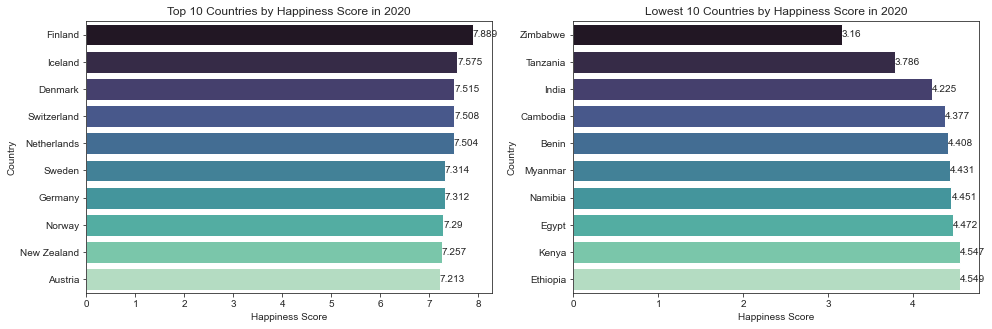

In [7]:
# Top 10 Countries by Happiness Score in 2020

data_2020 = data[ data['Year'] == 2020]

plt.figure(figsize=(16, 5))
plt.subplot(1,2,1)
order = data_2020.groupby(['Country'])['Happiness_score'].sum().sort_values(ascending=False).index[0:10]
ax = sns.barplot(x='Happiness_score', y='Country', data=data_2020, order=order, palette='mako')
ax.bar_label(ax.containers[0], fontsize=10)
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.title('Top 10 Countries by Happiness Score in 2020')

plt.subplot(1,2,2)
order = data_2020.groupby(['Country'])['Happiness_score'].sum().sort_values(ascending=True).index[0:10]
ax = sns.barplot(x='Happiness_score', y='Country', data=data_2020, order=order, palette='mako')
ax.bar_label(ax.containers[0], fontsize=10)
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.title('Lowest 10 Countries by Happiness Score in 2020')
plt.show()

In 2020, Finland has the highest happiness rate in the world, with a happiness rate of 7,889. Number two is Denmark, and number three is Switzerland. Of the 10 countries with the highest happiness scores, 9 came from Western Europe, who were not from Western Europe, namely New Zealand, North America.

Zimbabwe has the lowest happiness score in the world at 2020, with happiness score of just 3.16. The country with the lowest happiness score is dominated by the Sub-Saharan Africa region.

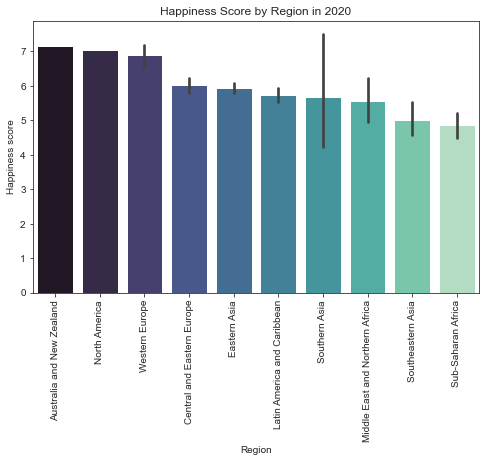

In [8]:
# Happiness Score by Region in 2020

order = data_2020.groupby(['Region'])['Happiness_score'].mean().sort_values(ascending=False).index

f, axe = plt.subplots(1, 1, figsize=(8,5))
sns.barplot(x='Region', y='Happiness_score', data=data_2020, order=order, palette='mako')
axe.yaxis.tick_left()
axe.tick_params(axis='x', rotation=90)
axe.set(xlabel='Region', ylabel='Happiness score', title='Happiness Score by Region in 2020');

Australia and New Zealand, North America and Western Europe have the highest scores for happiness. Meanwhile, Sub-Saharan Africa is the region with the lowest happiness score. It is interesting to study further regarding whether this region can affect the happiness score or not. This is due to the fact that countries such as Australia and New Zealand, North America and Western Europe tend to have higher happiness scores, while countries in Sub-Saharan Africa tend to have low happiness scores.

## Happiness and GDP

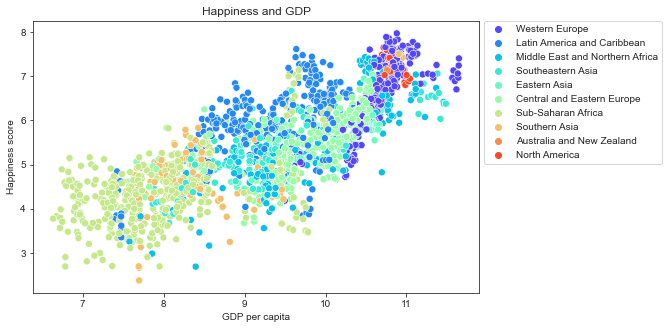

In [9]:
# Happiness and GDP
plt.figure(figsize=(8,5))
ax = sns.scatterplot(x=data['GDP'], y=data['Happiness_score'], hue=data['Region'], palette = 'rainbow', s=50)
plt.title('Happiness and GDP')
plt.xlabel('GDP per capita')
plt.ylabel('Happiness score')
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)

plt.show()

It can be seen in the graph, that the happiness score and GDP have a positive correlation. This shows that countries with good economies and high GDP tend to be happier than countries with low GDP. It also proves that it is difficult to be happy when a country's economy is in a bad state. Some people may say that money doesn't buy happiness, but they are still unaware of the part where money can be one of the greatest factors to be happy.

## Happiness and Social Support

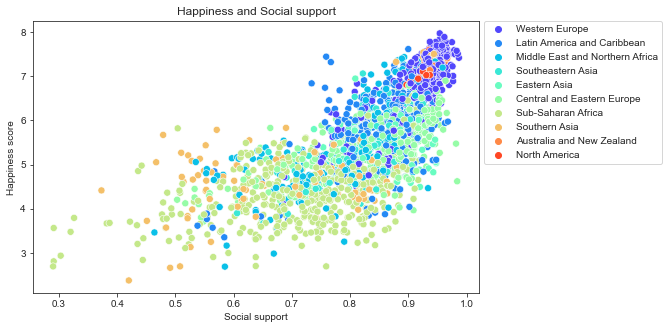

In [10]:
# Happiness and Social support
plt.figure(figsize=(8,5))
ax = sns.scatterplot(x=data['Social_support'], y=data['Happiness_score'], hue=data['Region'], palette = 'rainbow', s=50)
plt.title('Happiness and Social support')
plt.xlabel('Social support')
plt.ylabel('Happiness score')
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)

plt.show()

The following is a scatterplot that shows the relationship between happiness and social support. It can be seen that the correlation between the two is positive. This shows that the social support factor is one of the main factors in determining happiness score. Countries with high social support will have a high happiness score as well.

## Happiness and Healthy Life Expectancy

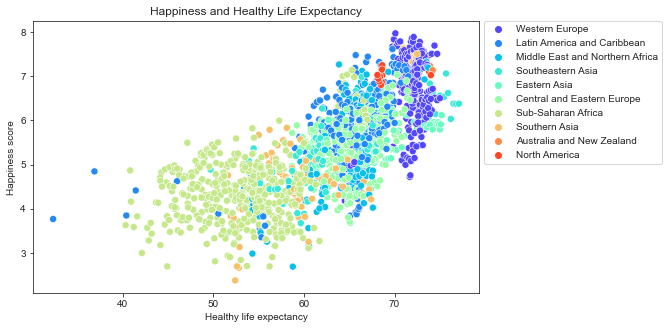

In [11]:
# Happiness and Healthy Life Expectancy
plt.figure(figsize=(8,5))
ax = sns.scatterplot(x=data['Healthy'], y=data['Happiness_score'], hue=data['Region'], palette = 'rainbow', s=50)
plt.title('Happiness and Healthy Life Expectancy')
plt.xlabel('Healthy life expectancy')
plt.ylabel('Happiness score')
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)

plt.show()

Countries in Western Europe, North America, and Australia & New Zealand have a higher life expectancy than countries in other regions. The high level of life expectancy is always followed of the advancement of the healthcare industry, due to more adequate medical facilities.

When compared to countries in Sub-Saharan Africa, the value of healthy life expectancy tends to be low. The main factor that can be used as a reason is the lack of medical resources in countries in the region.

## Happiness and Freedom

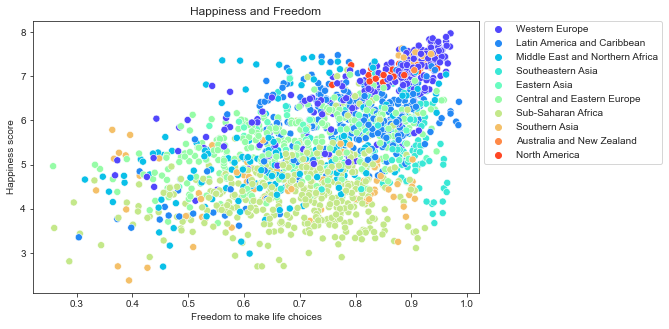

In [12]:
# Happiness and Freedom
plt.figure(figsize=(8,5))
ax = sns.scatterplot(x=data['Freedom'], y=data['Happiness_score'], hue=data['Region'], palette = 'rainbow', s=50)
plt.title('Happiness and Freedom')
plt.xlabel('Freedom to make life choices')
plt.ylabel('Happiness score')
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)

plt.show()

Another factor that affects a country's happiness is freedom. Freedom in this case means the ability to make life choices freely. Freedom will be the ability to get a job or anything to do. If seen from the graph, the relationship between happiness and freedom is positive, which concludes that countries with a high value of freedom will have a high happiness score as well.

## Happiness and Generosity

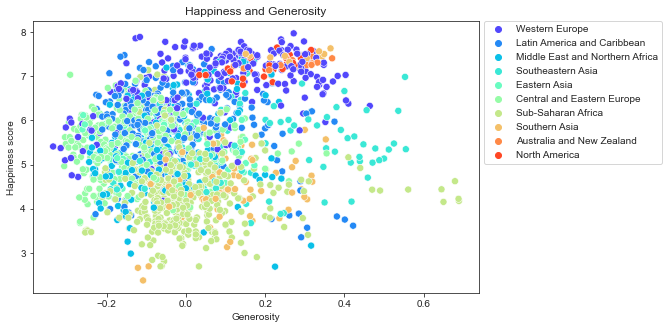

In [13]:
# Happiness and Generosity
plt.figure(figsize=(8,5))
ax = sns.scatterplot(x=data['Generosity'], y=data['Happiness_score'], hue=data['Region'], palette = 'rainbow', s=50)
plt.title('Happiness and Generosity')
plt.xlabel('Generosity')
plt.ylabel('Happiness score')
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)

plt.show()

Generosity seems to be a contributing factor for some countries to have a high happiness score. Generosity will improve the psychological well-being of everyone involved as well as have an impact on material well-being, which is a contributor to GDP. However, seen in the scatterplot below, many countries have low generosity, but in fact the happiness score is high. This shows that the correlation between happiness and generosity tends to be low, but the correlation value is positive.

## Happiness and Perceptions of corruption

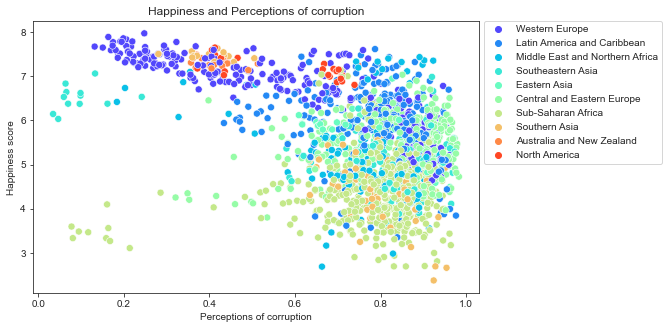

In [14]:
# Happiness and Perceptions of corruption
plt.figure(figsize=(8,5))
ax = sns.scatterplot(x=data['Corruption'], y=data['Happiness_score'], hue=data['Region'], palette = 'rainbow', s=50)
plt.title('Happiness and Perceptions of corruption')
plt.xlabel('Perceptions of corruption')
plt.ylabel('Happiness score')
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)

plt.show()

If seen from the graph, it is known that almost all countries tend to have a high perception of corruption towards the government. This is interesting because there are several countries that have a high perception of corruption and actually have a high happiness score, so for some countries the perception of corruption does not affect the happiness score. If we look at the correlation value, happiness and perceptions of corruption have a negative relationship, meaning that the higher the public's perception of corruption towards the government, the lower the happiness score will be. It makes sense to say that government corruption can reduce people's happiness. The practice of corruption led to the state budget which should have been used to improve the standard of living of the fleeing people and which only enjoyed by the corruptors.

## Correlation

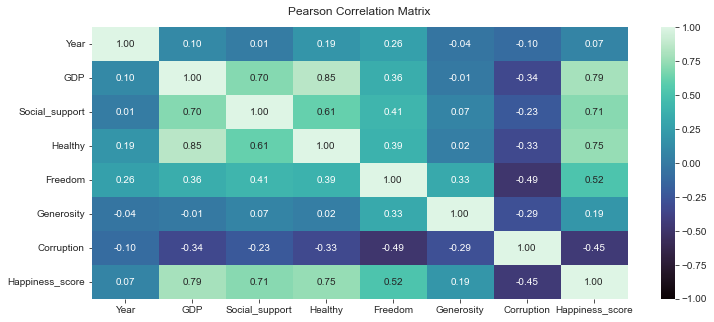

In [15]:
# Correlation
data = data[['Country', 'Region', 'Year', 'GDP', 'Social_support', 'Healthy', 'Freedom', 'Generosity', 
             'Corruption', 'Happiness_score']]

plt.figure(figsize=(12, 5))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='mako')
heatmap.set_title('Pearson Correlation Matrix', fontdict={'fontsize':12}, pad=12);

The GDP, social_support, healthy, freedom, and generosity features have a positive correlation value to the happiness score. This is in accordance with the previous explanation that when these features are of high value, the happiness score will also be high. GDP has the highest positive correlation value on the happiness score (0.79). The second is healthy (0.75), and the third is social support (0.71). Generosity has the lowest positive correlation value on the happiness score (0.19).

Feature corruption has a negative correlation value to the happiness score. This shows that when corruption (public perception of corruption towards the government) is low, the happiness score will be high. The correlation value between corruption and happiness is -0.45, meaning that corruption has a fairly strong correlation with happiness.

# 5. Data Preprocessing

## Feature Selection

Based on the correlation value, the features that have a high correlation value will be selected so that the model can predict accurately. The year column is not included because it has a low correlation value. The Region column will be included in the model because if you look at the happiness score by region graph, there is a fairly high gap between regions, so it is suspected that there is an influence of region on the happiness score.

The features that will be used in making the model are GDP, Social_support, Healthy, Freedom, Generosity, Corruption, and Region.

In [16]:
# Define data_new using feature_important
data_new = data[['Region', 'GDP', 'Social_support', 'Healthy', 'Freedom', 'Generosity', 'Corruption', 'Happiness_score']]

data_new

,Region,GDP,Social_support,Healthy,Freedom,Generosity,Corruption,Happiness_score
0,Western Europe,10.745,0.965,69.76,0.969,-0.005,0.132,7.672
1,Western Europe,11.050,0.951,71.54,0.919,0.290,0.408,7.473
2,Western Europe,11.031,0.959,71.32,0.960,0.109,0.397,7.416
3,Western Europe,10.526,0.946,71.20,0.932,0.312,0.224,7.305
4,Western Europe,10.972,0.967,70.14,0.943,0.242,0.473,7.144
...,...,...,...,...,...,...,...,...
1778,Sub-Saharan Africa,8.102,0.507,55.10,0.783,-0.083,0.532,4.408
1779,Southeastern Asia,8.362,0.724,62.40,0.963,0.052,0.863,4.377
1780,Southern Asia,8.703,0.617,60.90,0.906,0.075,0.780,4.225
1781,Sub-Saharan Africa,7.881,0.740,58.50,0.830,0.295,0.521,3.786


## Data Inference Selection

Data inference is data that is not included in the training or test data. This data inference sharing is needed to evaluate the model whether the model can estimate the label (y) if new data is added. The data inference to be determined is 10 data, taken randomly from the dataset.

In [17]:
# Get Data for Model Inference

data_inf = data_new.sample(10, random_state=26)
data_inf

,Region,GDP,Social_support,Healthy,Freedom,Generosity,Corruption,Happiness_score
17,Latin America and Caribbean,9.850,0.836,68.66,0.744,0.168,0.634,6.063
870,Sub-Saharan Africa,8.230,0.757,57.38,0.775,0.689,0.638,4.176
181,Western Europe,10.528,0.944,71.60,0.893,0.298,0.334,7.381
1131,Sub-Saharan Africa,8.249,0.777,58.30,0.793,0.221,0.853,4.358
1467,Central and Eastern Europe,10.376,0.922,68.90,0.758,-0.167,0.910,6.235
1374,Western Europe,10.278,0.753,72.20,0.438,-0.290,0.872,5.148
1583,Western Europe,10.677,0.922,72.20,0.924,0.087,0.689,6.733
593,Latin America and Caribbean,7.423,0.567,36.86,0.413,0.243,0.682,4.845
1597,Central and Eastern Europe,10.179,0.951,65.20,0.852,-0.055,0.708,6.272
272,Southern Asia,7.370,0.451,50.80,0.718,0.168,0.882,3.724


## Data Train and Test Selection

The data to be tested is a dataset without data inference, so the index data inference needs to be deleted first.

In [18]:
# Remove Inference-set from Dataset

data_train_test = data_new.drop(data_inf.index)
data_train_test

,Region,GDP,Social_support,Healthy,Freedom,Generosity,Corruption,Happiness_score
0,Western Europe,10.745,0.965,69.76,0.969,-0.005,0.132,7.672
1,Western Europe,11.050,0.951,71.54,0.919,0.290,0.408,7.473
2,Western Europe,11.031,0.959,71.32,0.960,0.109,0.397,7.416
3,Western Europe,10.526,0.946,71.20,0.932,0.312,0.224,7.305
4,Western Europe,10.972,0.967,70.14,0.943,0.242,0.473,7.144
...,...,...,...,...,...,...,...,...
1778,Sub-Saharan Africa,8.102,0.507,55.10,0.783,-0.083,0.532,4.408
1779,Southeastern Asia,8.362,0.724,62.40,0.963,0.052,0.863,4.377
1780,Southern Asia,8.703,0.617,60.90,0.906,0.075,0.780,4.225
1781,Sub-Saharan Africa,7.881,0.740,58.50,0.830,0.295,0.521,3.786


Reset_index() is used to reset the index that has been reset and make the index default, which is an integer starting from 0. Reset_index is performed on data_train_test and data inference.

In [19]:
# Reset Index

data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

Splitting dataset is needed to divide the dataset into two parts, namely training data and data_test with certain proportions. The proportion of sizes used for data splitting is 75% for training data and 25% for test data.

In [20]:
# Splitting Dataset

X = data_train_test.drop(['Happiness_score'], axis=1)
y = data_train_test['Happiness_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=26)

print(X_train.shape)
print(X_test.shape)

(1329, 7)
(444, 7)


## Data Distribution

In analyzing data we need to understand the distribution of data in each column. The distribution of the data will help us detect possible problems such as the presence of extreme outliers or outliers and large deviations. Skewness can indicate the condition of the distribution or distribution of data.

*Skewness* provides an overview of the data distribution whether it is skewed to the left, right or symmetrical.
- If the slope is between -0.5 and 0.5, then the data is normal.
- If the slope is between -1 and –0.5 or between 0.5 and 1, then the data is skewed.
- If the slope is less than -1 or greater than 1, then the data is highly skewed.

The following is the distribution value of each feature:

In [21]:
# Check Distributions

X_train_skewness = pd.DataFrame(X_train.skew(axis=0), columns=['skewness_value']).reset_index()
X_train_skewness.rename(columns={'index':'column'}, inplace=True)
X_train_skewness['distribution'] = np.where(
    (X_train_skewness['skewness_value'] < 0.5) & (X_train_skewness['skewness_value'] > -0.5),'normal', 
    'skewed')
X_train_skewness

,column,skewness_value,distribution
0,GDP,-0.359531,normal
1,Social_support,-1.127020,skewed
2,Healthy,-0.719358,skewed
3,Freedom,-0.617177,skewed
4,Generosity,0.865582,skewed
5,Corruption,-1.610533,skewed


The data distribution visualization of each feature is as follows:

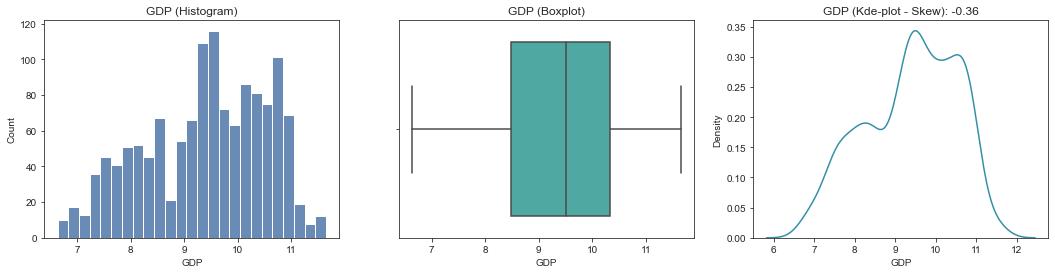

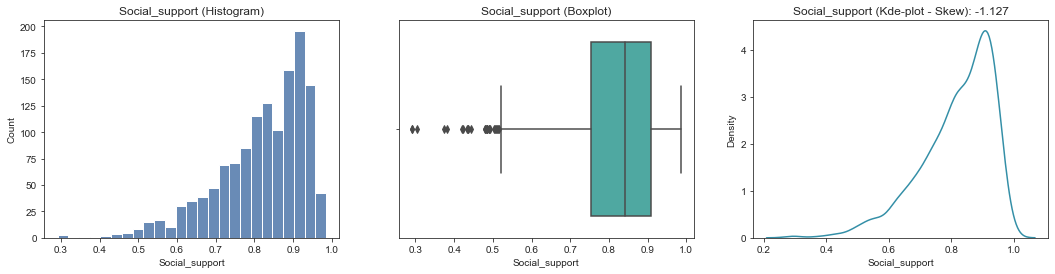

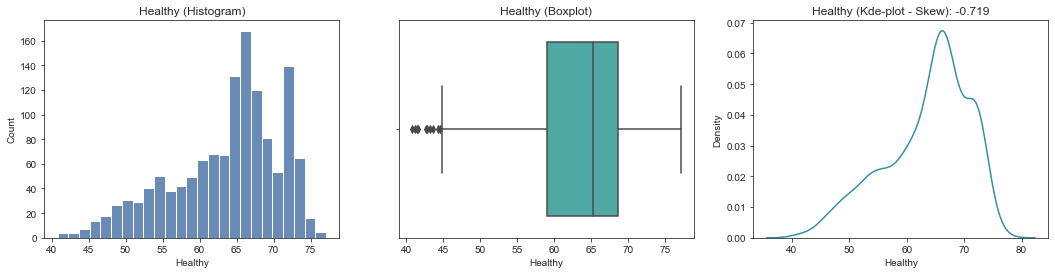

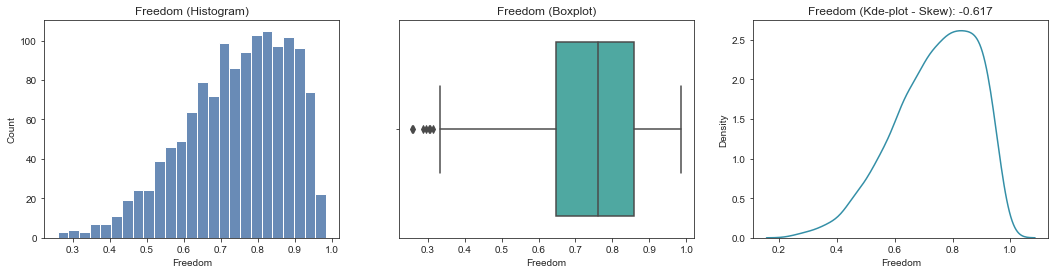

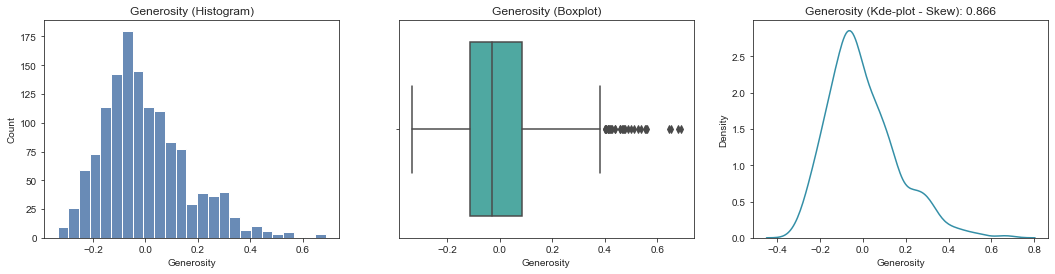

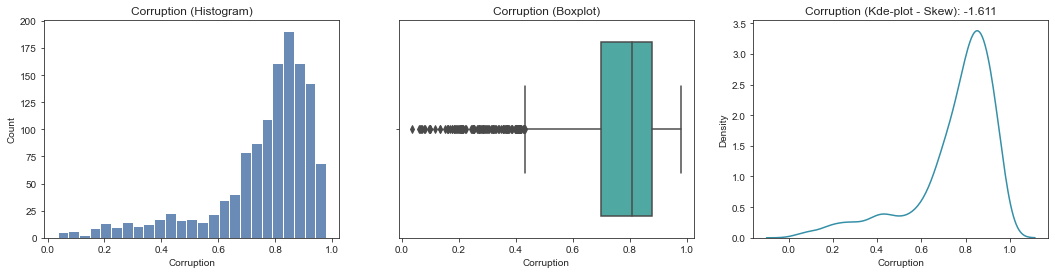

In [22]:
# Define num_columns & cat_columns
num_columns = ['GDP', 'Social_support', 'Healthy', 'Freedom', 'Generosity', 'Corruption']
cat_columns = ['Region']

# Visualization of Column Distributions

for col in X_train[num_columns].columns:
    fig, ax = plt.subplots(1,3, figsize=(18,4))

    sns.histplot(x=X_train[col], ax=ax[0], bins=25, color=palette[2])
    sns.boxplot(x=X_train[col], ax=ax[1], color=palette[4])
    sns.kdeplot(x=X_train[col], ax=ax[2], color=palette[3])
    skew_val = round(X_train[col].skew(),3)

    ax[0].set_title(col + ' (Histogram)')
    ax[1].set_title(col + ' (Boxplot)')
    ax[2].set_title(col + ' (Kde-plot - Skew): ' + str(skew_val))
    plt.show()

If we look at the boxplot distribution on features, some features have outliers, but outliers are not deleted because the data is important information, so outliers will be considered as extreme values.

## Handling Missing Values

The following is a check how many missing values on X_train and y_train. It is known that there are no missing values in the X_train and y_train data. There are missing values in the X_train data, namely the 'Corruption' feature, but there are no missing values in the y_train.

In [23]:
# Check How Many Missing Values in X_train

pd.DataFrame({'X_train missing value':X_train.isnull().sum()})

,X_train missing value
Region,0
GDP,0
Social_support,0
Healthy,0
Freedom,0
Generosity,0
Corruption,57


In [24]:
# Check How Many Missing Values in y_train

y_train.isnull().sum()

0

this is checking how many missing values in X_test and y_test. There are missing values in the X_test data, namely the 'Corruption' feature, but there are no missing values in the y_test.

In [25]:
# Check How Many Missing Values in X_test

pd.DataFrame({'X_test missing value':X_test.isnull().sum()})

,X_test missing value
Region,0
GDP,0
Social_support,0
Healthy,0
Freedom,0
Generosity,0
Corruption,20


In [26]:
# Check How Many Missing Values in y_test

y_test.isnull().sum()

0

The value of perception corruption in each country has a different number, so the missing values cannot be imputed with the mean or median values. Missing values will be resolved by deleting the missing values data.

In [27]:
# Handling Missing Values for Train-set

missval_in_X_train = np.where(X_train['Corruption'].isnull(), True, False)

X_train = X_train.loc[~(missval_in_X_train)] 
y_train = y_train.loc[~(missval_in_X_train)]

# Handling Missing Values for Test-set

missval_in_X_test = np.where(X_test['Corruption'].isnull(), True, False)

X_test = X_test.loc[~(missval_in_X_test)] 
y_test = y_test.loc[~(missval_in_X_test)]

## Pipeline for Preprocessing

Data preprocessing will be done using Pipeline, where numerical data will be scaled and categorical data will be encoded, then both data will be combined in the same pipeline using ColumnTransformer.

In [28]:
# Pipeline for numerical columns
numerical_pipeline = Pipeline([('scaler', StandardScaler())])

# Pipeline for categorical columns
categorical_pipeline = Pipeline([('encode', OneHotEncoder())])

# ColumnTransformer for numerical and categorical columns
Preprocessor = ColumnTransformer([
    ('numerical', numerical_pipeline, num_columns),
    ('categorical', categorical_pipeline, cat_columns)]).fit(X_train)

# 6. Model Definition

The models in this analysis are as follows:
1. Linear Regression
2. Ridge Regression
3. Lasso Regression
4. K-Neighbors Regression
5. XG Boost Regression.

The following defines the model for each of these models:

In [29]:
# Pipeline for Define Preprocessor and Regressor

lr_pipeline = Pipeline([
    ('prep', Preprocessor),
    ('rgr', LinearRegression())])

rd_pipeline = Pipeline([
    ('prep', Preprocessor),
    ('rgr', Ridge())])

ls_pipeline = Pipeline([
    ('prep', Preprocessor),
    ('rgr', Lasso())])

kn_pipeline = Pipeline([
    ('prep', Preprocessor),
    ('rgr', KNeighborsRegressor())])

xg_pipeline = Pipeline([
    ('prep', Preprocessor),
    ('rgr', XGBRegressor())])

# 7. Model Training

Model training aims to train the model and the resulting output. The defined model will be tuned with several parameters using GridSearchCV to find the best parameter with the best score that can be used to create a model.

In [30]:
# Tuning Hyperparameter with GridSearchCV for Model Linear Regression

## Train model without Hyperparameter Tuning
lr_pipeline.fit(X_train, y_train)

## Create the parameter grid
lr_parameters = {
    'rgr__fit_intercept' : [True, False],
    'rgr__normalize' : [True, False]}

## Train model with Hyperparameter Tuning (grid search model)
lr_grid = GridSearchCV(lr_pipeline, lr_parameters, n_jobs=-1, verbose=1, cv=3).fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


In [31]:
# Tuning Hyperparameter with GridSearchCV for Model Ridge Regression

## Train model without Hyperparameter Tuning
rd_pipeline.fit(X_train, y_train)

## Create the parameter grid
rd_parameters = {
    'rgr__alpha' : [1, 10, 100, 1000],
    'rgr__solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

## Train model with Hyperparameter Tuning (grid search model)
rd_grid = GridSearchCV(rd_pipeline, rd_parameters, n_jobs=-1, verbose=1, cv=3).fit(X_train, y_train)

Fitting 3 folds for each of 28 candidates, totalling 84 fits


In [32]:
# Tuning Hyperparameter with GridSearchCV for Model Lasso Regression

## Train model without Hyperparameter Tuning
ls_pipeline.fit(X_train, y_train)

## Create the parameter grid
ls_parameters = {
    'rgr__alpha' : [1, 0.1, 0.01, 0.001, 0.0001],
    'rgr__selection' : ['cyclic', 'random']}

## Train model with Hyperparameter Tuning (grid search model)
ls_grid = GridSearchCV(ls_pipeline, ls_parameters, n_jobs=-1, verbose=1, cv=3).fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [33]:
# Tuning Hyperparameter with GridSearchCV for Model K-Nearest Neighbors Regression

## Train model without Hyperparameter Tuning
kn_pipeline.fit(X_train, y_train)

## Create the parameter grid
kn_parameters = {'rgr__n_neighbors': [10, 15, 20]}

## Train model with Hyperparameter Tuning (grid search model)
kn_grid = GridSearchCV(kn_pipeline, kn_parameters, n_jobs=-1, verbose=1, cv=3).fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


In [34]:
# Tuning Hyperparameter with GridSearchCV for Model XG Boost Regression

## Train model without Hyperparameter Tuning
xg_pipeline.fit(X_train, y_train)

## Create the parameter grid
xg_parameters = {
        'rgr__learning_rate': [1, 0.1, 0.01, 0.001],
        'rgr__n_estimators': [100, 150, 200]}

## Train model with Hyperparameter Tuning (grid search model)
xg_grid = GridSearchCV(xg_pipeline, xg_parameters, n_jobs=-1, verbose=1, cv=3).fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


# 8. Model Evaluation

## Linear Regression

In [35]:
# Evaluation Metrics for Linear Regression
y_train_lr = lr_pipeline.predict(X_train)
y_test_lr = lr_pipeline.predict(X_test)

r2_lrt = r2_score(y_train,y_train_lr)
r2_lr = r2_score(y_test,y_test_lr)
mae_lr = mean_absolute_error(y_test,y_test_lr)
rmse_lr = mean_squared_error(y_test,y_test_lr, squared=False)

print('Evaluation Metrics for Linear Regression :')
print('R-squared Train :', r2_lrt)
print('R-squared Test  :', r2_lr)
print('MAE Test        :', mae_lr)
print('RMSE Test       :', rmse_lr)

Evaluation Metrics for Linear Regression :
R-squared Train : 0.7754942084487312
R-squared Test  : 0.7791010943334445
MAE Test        : 0.41679818036186256
RMSE Test       : 0.5489861571896927


Based on the evaluation metrics on the Linear Regression Model, information can be obtained:
- Underfitting model, because the R-squared Train is smaller than the R-squared Test. However, this is not a problem because the gap between the R-square Train and the R-square Test is relatively small.
- R-squared Test 0.7791, meaning that the model's level of accuracy to predict a country's happiness score is 77.91%.
- MAE Test 0.4167, meaning that the average absolute error between the actual value and the predicted value is 0.4167.
- RMSE Test, 0.5489, meaning that the average error value in the model in predicting a country's happiness score is 0.5489.
- The Linear Regression model provides a fairly good level of accuracy because the R-squared value is above 0.7 and the error is less than 1. This model can be used to predict a country's happiness score.

In [36]:
# Evaluation Metrics for Linear Regression (Hyperparameter)
lrg_best_params    = lr_grid.best_params_
lrg_best_estimator = lr_grid.best_estimator_

y_train_lrg = lrg_best_estimator.predict(X_train)
y_test_lrg = lrg_best_estimator.predict(X_test)

r2_lrgt = r2_score(y_train,y_train_lrg)
r2_lrg = r2_score(y_test,y_test_lrg)
mae_lrg = mean_absolute_error(y_test,y_test_lrg)
rmse_lrg = mean_squared_error(y_test,y_test_lrg, squared=False)

print('Evaluation Metrics for Linear Regression (Hyperparameter):')
print('Best Parameters :', lrg_best_params)
print('R-squared Train :', r2_lrgt)
print('R-squared Test  :', r2_lrg)
print('MAE Test        :', mae_lrg)
print('RMSE Test       :', rmse_lrg)

Evaluation Metrics for Linear Regression (Hyperparameter):
Best Parameters : {'rgr__fit_intercept': True, 'rgr__normalize': True}
R-squared Train : 0.7754942084487312
R-squared Test  : 0.7791010943334445
MAE Test        : 0.41679818036186256
RMSE Test       : 0.5489861571896927


Best parameter of Linear Regression model with hyperparameter tuning is 'rgr__fit_intercept': True, 'rgr__normalize': True. Based on the evaluation metrics, it is known that there is no difference in the evaluation values between the linear regression models without hyperparameter tuning and with hyperparameter tuning. Interpretation is also the same as the model without hyperparameter tuning.

## Ridge Regression

In [37]:
# Evaluation Metrics for Ridge Regression
y_train_rd = rd_pipeline.predict(X_train)
y_test_rd = rd_pipeline.predict(X_test)

r2_rdt = r2_score(y_train,y_train_rd)
r2_rd = r2_score(y_test,y_test_rd)
mae_rd = mean_absolute_error(y_test,y_test_rd)
rmse_rd = mean_squared_error(y_test,y_test_rd, squared=False)

print('Evaluation Metrics for Ridge Regression :')
print('R-squared Train :', r2_rdt)
print('R-squared Test  :', r2_rd)
print('MAE Test        :', mae_rd)
print('RMSE Test       :', rmse_rd)

Evaluation Metrics for Ridge Regression :
R-squared Train : 0.7754858727167661
R-squared Test  : 0.7789827588545889
MAE Test        : 0.4168097784180524
RMSE Test       : 0.5491331833634044


Based on the evaluation metrics on the Ridge Regression Model, information can be obtained:
- Underfitting model, because the R-squared Train is smaller than the R-squared Test. However, this is not a problem because the gap between the R-square Train and the R-square Test is relatively small.
- R-squared Test 0.7789, meaning that the model's level of accuracy to predict the happiness score of a country is 77.89%.
- MAE Test 0.4168, meaning that the average absolute error between the actual value and the predicted value is 0.4168.
- RMSE Test, 0.5491, meaning that the average error value in the model in predicting a country's happiness score is 0.5491.
- The Ridge Regression model provides a fairly good level of accuracy because the R-squared value is above 0.7 and the error is less than 1. This model can be used to predict a country's happiness score.

In [38]:
# Evaluation Metrics for Ridge Regression (Hyperparameter)
rdg_best_params    = rd_grid.best_params_
rdg_best_estimator = rd_grid.best_estimator_

y_train_rdg = rdg_best_estimator.predict(X_train)
y_test_rdg = rdg_best_estimator.predict(X_test)

r2_rdgt = r2_score(y_train,y_train_rdg)
r2_rdg = r2_score(y_test,y_test_rdg)
mae_rdg = mean_absolute_error(y_test,y_test_rdg)
rmse_rdg = mean_squared_error(y_test,y_test_rdg, squared=False)

print('Evaluation Metrics for Ridge Regression (Hyperparameter) :')
print('Best Parameters :', rdg_best_params)
print('R-squared Train :', r2_rdgt)
print('R-squared Test  :', r2_rdg)
print('MAE Test        :', mae_rdg)
print('RMSE Test       :', rmse_rdg)

Evaluation Metrics for Ridge Regression (Hyperparameter) :
Best Parameters : {'rgr__alpha': 10, 'rgr__solver': 'auto'}
R-squared Train : 0.7750701473783144
R-squared Test  : 0.7779647755388681
MAE Test        : 0.4178931403996807
RMSE Test       : 0.5503963567922644


The best parameters of the Ridge Regression model with hyperparameter tuning are 'rgr__alpha': 1, 'rgr__solver': 'auto'. As for the evaluation metrics, it is known that there is no difference in the evaluation value between the lasso regression model without hyperparameter tuning and with hyperparameter tuning. Interpretation is also the same as the model without hyperparameter tuning.

## Lasso Regression

In [39]:
# Evaluation Metrics for Lasso Regression
y_train_ls = ls_pipeline.predict(X_train)
y_test_ls = ls_pipeline.predict(X_test)

r2_lst = r2_score(y_train,y_train_ls)
r2_ls = r2_score(y_test,y_test_ls)
mae_ls = mean_absolute_error(y_test,y_test_ls)
rmse_ls = mean_squared_error(y_test,y_test_ls, squared=False)

print('Evaluation Metrics for Lasso Regression')
print('R-squared Train :', r2_lst)
print('R-squared Test  :', r2_ls)
print('MAE Test        :', mae_ls)
print('RMSE Test       :', rmse_ls)

Evaluation Metrics for Lasso Regression
R-squared Train : 0.0
R-squared Test  : -0.017761856130058762
MAE Test        : 0.9857221208615166
RMSE Test       : 1.1783863324876447


Based on the evaluation metrics on the Ridge Regression Model, information can be obtained:
- Overfitting model, because the R-squared Train is bigger than the R-squared Test.
- R-squared Test 0.0, meaning that the model's level of accuracy for predicting a country's happiness score is 0%.
- MAE Test 0.9857, meaning that the average absolute error between the actual value and the predicted value is 0.9857.
- RMSE Test, 1.1783, meaning that the average error value in the model in predicting a country's happiness score is 1.1783.
- The Ridge Regression model gives a poor level of accuracy because the R-squared value is 0 and the error is more than 1, this model cannot be used to predict the happiness score of a country.

In [40]:
# Evaluation Metrics for Lasso Regression (Hyperparameter)
lsg_best_params    = ls_grid.best_params_
lsg_best_estimator = ls_grid.best_estimator_

y_train_lsg = lsg_best_estimator.predict(X_train)
y_test_lsg = lsg_best_estimator.predict(X_test)

r2_lsgt = r2_score(y_train,y_train_lsg)
r2_lsg = r2_score(y_test,y_test_lsg)
mae_lsg = mean_absolute_error(y_test,y_test_lsg)
rmse_lsg = mean_squared_error(y_test,y_test_lsg, squared=False)

print('Evaluation Metrics for Lasso Regression (Hyperparameter)')
print('Best Parameters :', lsg_best_params)
print('R-squared Train :', r2_lsgt)
print('R-squared Test  :', r2_lsg)
print('MAE Test        :', mae_lsg)
print('RMSE Test       :', rmse_lsg)

Evaluation Metrics for Lasso Regression (Hyperparameter)
Best Parameters : {'rgr__alpha': 0.0001, 'rgr__selection': 'random'}
R-squared Train : 0.7754915531230324
R-squared Test  : 0.778980772677721
MAE Test        : 0.416851762179568
RMSE Test       : 0.5491356507572833


Best parameter of Lasso Regression model with hyperparameter tuning is 'rgr__alpha': 0.0001, 'rgr__selection': 'cyclic'. Hyperparameter tuning in the Lasso regression model has a good influence on the evaluation metrics, because the R-squared Train and Test increased significantly. The interpretation of the evaluation metrics model is:
- Underfitting model, because the R-squared Train is smaller than the R-squared Test. However, this is not a problem because the gap between the R-square Train and the R-square Test is relatively small.
- R-squared Test 0.7789, meaning that the model's level of accuracy to predict the happiness score of a country is 77.89%.
- MAE Test 0.4168, meaning that the average absolute error between the actual value and the predicted value is 0.4168.
- RMSE Test, 0.5491, meaning that the average error value in the model in predicting a country's happiness score is 0.5491.
- The Lasso Regression model provides a fairly good level of accuracy because the R-squared value is above 0.7 and the error is less than 1. This model can be used to predict the happiness score of a country.

## K-Neighbors Regression

In [41]:
# Evaluation Metrics for K-Neighbors Regression
y_train_kn = kn_pipeline.predict(X_train)
y_test_kn = kn_pipeline.predict(X_test)

r2_knt = r2_score(y_train,y_train_kn)
r2_kn = r2_score(y_test,y_test_kn)
mae_kn = mean_absolute_error(y_test,y_test_kn)
rmse_kn = mean_squared_error(y_test,y_test_kn, squared=False)

print('Evaluation Metrics for K-Neighbors Regression')
print('R-squared Train :', r2_knt)
print('R-squared Test  :', r2_kn)
print('MAE Test        :', mae_kn)
print('RMSE Test       :', rmse_kn)

Evaluation Metrics for K-Neighbors Regression
R-squared Train : 0.9075918679230925
R-squared Test  : 0.8538857936357118
MAE Test        : 0.33562075471698116
RMSE Test       : 0.44648907147140365


Based on the evaluation metrics on the K-Neighbors Regression Model, information can be obtained:
- Overfitting model, because the R-squared Train is smaller than the R-squared Test. However, this is not a problem because the gap between the R-square Train and the R-square Test is relatively small.
- R-squared Test 0.8538, meaning that the model's level of accuracy for predicting a country's happiness score is 85.38%.
- MAE Test 0.3356, meaning that the average absolute error between the actual value and the predicted value is 0.3356.
- RMSE Test, 0.4464, meaning that the average error value in the model in predicting a country's happiness score is 0.4464.
- The K-Neighbors Regression model provides a fairly good level of accuracy because the R-squared value is above 80 and the error is small (not exceeding 1), this model can be used to predict the happiness score of a country.

In [42]:
# Evaluation Metrics for K-Neighbors Regression (Hyperparameter)
kng_best_params    = kn_grid.best_params_
kng_best_estimator = kn_grid.best_estimator_

y_train_kng = kng_best_estimator.predict(X_train)
y_test_kng = kng_best_estimator.predict(X_test)

r2_kngt = r2_score(y_train,y_train_kng)
r2_kng = r2_score(y_test,y_test_kng)
mae_kng = mean_absolute_error(y_test,y_test_kng)
rmse_kng = mean_squared_error(y_test,y_test_kng, squared=False)

print('Evaluation Metrics for K-Neighbors Regression (Hyperparameter)')
print('Best Parameters :', kng_best_params)
print('R-squared Train :', r2_kngt)
print('R-squared Test  :', r2_kng)
print('MAE Test        :', mae_kng)
print('RMSE Test       :', rmse_kng)

Evaluation Metrics for K-Neighbors Regression (Hyperparameter)
Best Parameters : {'rgr__n_neighbors': 10}
R-squared Train : 0.8765999764078021
R-squared Test  : 0.8489430937434577
MAE Test        : 0.3456044811320754
RMSE Test       : 0.45397810164023095


The best parameter of the K-Neighbors Regression model with hyperparameter tuning is 'rgr__n_neighbors': 10. Hyperparameter tuning in the K-Neighbors regression model has a pretty good effect on the evaluation metrics, because the evaluation of metrics after hyperparameter tuning affects the R-squared Train and Test values , thereby reducing the gap between the two. The interpretation of the evaluation metrics model is:
- Overfitting model, because the R-squared Train is bigger than the R-squared Test. However, this is not a problem because the gap between the R-square Train and the R-square Test is relatively small.
- R-squared Test 0.8489, meaning that the model's level of accuracy to predict a country's happiness score is 84.89%.
- MAE Test is 0.3456, meaning that the average absolute error between the actual value and the predicted value is 0.3456.
- RMSE Test, 0.4539, meaning that the average error value in the model in predicting a country's happiness score is 0.4539.
- The K-Neighbors Regression model provides a fairly good level of accuracy because the R-squared value is above 0.8 and the error is less than 1. This model can be used to predict the happiness score of a country.

## XG Boost Regression

In [43]:
# Evaluation Metrics for XG Boost Regression
y_train_xg = xg_pipeline.predict(X_train)
y_test_xg = xg_pipeline.predict(X_test)

r2_xgt = r2_score(y_train,y_train_xg)
r2_xg = r2_score(y_test,y_test_xg)
mae_xg = mean_absolute_error(y_test,y_test_xg)
rmse_xg = mean_squared_error(y_test,y_test_xg, squared=False)

print('Evaluation Metrics for XG Boost Regression')
print('R-squared Train :', r2_xgt)
print('R-squared Test  :', r2_xg)
print('MAE Test        :', mae_xg)
print('RMSE Test       :', rmse_xg)

Evaluation Metrics for XG Boost Regression
R-squared Train : 0.9974827911473865
R-squared Test  : 0.8428135516767019
MAE Test        : 0.3432389277602142
RMSE Test       : 0.46309720739399163


Based on the evaluation metrics on the XG Boost Regression Model, information can be obtained:
- Overfitting model, because the R-squared Train is smaller than the R-squared Test. However, this is not a problem because the gap between the R-square Train and the R-square Test is relatively small.
- R-squared Test 0.8428, meaning that the model's level of accuracy for predicting the happiness score of a country is 84.28%.
- MAE Test 0.3432, meaning that the average absolute error between the actual value and the predicted value is 0.3432.
- RMSE Test, 0.4630, meaning that the average error value in the model in predicting a country's happiness score is 0.4630.
- The XG Boost Regression model provides a fairly good level of accuracy because the R-squared value is above 80 and the error is small (not exceeding 1), this model can be used to predict country's happiness score.

In [44]:
# Evaluation Metrics for XG Boost Regression (Hyperparameter)
xgg_best_params    = xg_grid.best_params_
xgg_best_estimator = xg_grid.best_estimator_

y_train_xgg = xgg_best_estimator.predict(X_train)
y_test_xgg = xgg_best_estimator.predict(X_test)

r2_xggt = r2_score(y_train,y_train_xgg)
r2_xgg = r2_score(y_test,y_test_xgg)
mae_xgg = mean_absolute_error(y_test,y_test_xgg)
rmse_xgg = mean_squared_error(y_test,y_test_xgg, squared=False)

print('Evaluation Metrics for XG Boost Regression (Hyperparameter)')
print('Best Parameters :', xgg_best_params)
print('R-squared Train :', r2_xggt)
print('R-squared Test  :', r2_xgg)
print('MAE Test        :', mae_xgg)
print('RMSE Test       :', rmse_xgg)

Evaluation Metrics for XG Boost Regression (Hyperparameter)
Best Parameters : {'rgr__learning_rate': 0.1, 'rgr__n_estimators': 200}
R-squared Train : 0.9916847127682836
R-squared Test  : 0.8651703970533623
MAE Test        : 0.3234290142779081
RMSE Test       : 0.4289011783006449


The best parameter of the XG Boost Regression model with hyperparameter tuning is 'rgr__learning_rate': 0.1, 'rgr__n_estimators': 200. Hyperparameter tuning in the XG Boost regression model has a pretty good effect on the evaluation metrics, because the evaluation of metrics after hyperparameter tuning affects the R-value. squared Train and Test, thereby reducing the gap between the two and the R-square Test also increases. The interpretation of the evaluation metrics model is:
- Overfitting model, because the R-squared Train is bigger than the R-squared Test. However, this is not a problem because the gap between the R-square Train and the R-square Test is relatively small.
- R-squared Test 0.8651, meaning that the model's accuracy rate for predicting a country's happiness score is 86.51%.
- MAE Test 0.3234, meaning that the average absolute error between the actual value and the predicted value is 0.3234.
- RMSE Test, 0.4289, meaning that the average error value in the model in predicting a country's happiness score is 0.4289.
- The XG Boost Regression model provides a fairly good level of accuracy because the R-squared value is above 0.8 and the error is less than 1. This model can be used to predict a country's happiness score.

## Best Model Selection

In [45]:
# Evaluation Models
evaluation = pd.DataFrame({'Model': [],
                           'Parameters':[],
                           'R-squared (train)':[],
                           'R-squared (test)':[],
                           'MAE (test)':[],
                           'RMSE (test)':[]})
r = evaluation.shape[0]
evaluation.loc[r]   = ['Linear Regression', 'Default', r2_lrt, r2_lr, mae_lr, rmse_lr]
evaluation.loc[r+1] = ['Linear Regression', lrg_best_params, r2_lrgt, r2_lrg, mae_lrg, rmse_lrg]
evaluation.loc[r+2] = ['Ridge Regression', 'Default', r2_rdt, r2_rd, mae_rd, rmse_rd]
evaluation.loc[r+3] = ['Ridge Regression', rdg_best_params, r2_rdgt, r2_rdg, mae_rdg, rmse_rdg]
evaluation.loc[r+4] = ['Lasso Regression', 'Default', r2_lst, r2_ls, mae_ls, rmse_ls]
evaluation.loc[r+5] = ['Lasso Regression', lsg_best_params, r2_lsgt, r2_lsg, mae_lsg, rmse_lsg]
evaluation.loc[r+6] = ['K-Neighbors Regression', 'Default', r2_knt, r2_kn, mae_kn, rmse_kn]
evaluation.loc[r+7] = ['K-Neighbors Regression', kng_best_params, r2_kngt, r2_kng, mae_kng, rmse_kng]
evaluation.loc[r+8] = ['XG Boost Regression', 'Default', r2_xgt, r2_xg, mae_xg, rmse_xg]
evaluation.loc[r+9] = ['XG Boost Regression', xgg_best_params, r2_xggt, r2_xgg, mae_xgg, rmse_xgg]
pd.set_option('display.max_colwidth', None)
evaluation

,Model,Parameters,R-squared (train),R-squared (test),MAE (test),RMSE (test)
0,Linear Regression,Default,0.775494,0.779101,0.416798,0.548986
1,Linear Regression,"{'rgr__fit_intercept': True, 'rgr__normalize': True}",0.775494,0.779101,0.416798,0.548986
2,Ridge Regression,Default,0.775486,0.778983,0.416810,0.549133
3,Ridge Regression,"{'rgr__alpha': 10, 'rgr__solver': 'auto'}",0.775070,0.777965,0.417893,0.550396
4,Lasso Regression,Default,0.000000,-0.017762,0.985722,1.178386
5,Lasso Regression,"{'rgr__alpha': 0.0001, 'rgr__selection': 'random'}",0.775492,0.778981,0.416852,0.549136
6,K-Neighbors Regression,Default,0.907592,0.853886,0.335621,0.446489
7,K-Neighbors Regression,{'rgr__n_neighbors': 10},0.876600,0.848943,0.345604,0.453978
8,XG Boost Regression,Default,0.997483,0.842814,0.343239,0.463097
9,XG Boost Regression,"{'rgr__learning_rate': 0.1, 'rgr__n_estimators': 200}",0.991685,0.865170,0.323429,0.428901


The best model is the model that has the highest R-squared, and the lowest MAE & RMSE. The best model, based on R-squared, MAE, and RMSE, is the XG Boost Regression model with parameter learning rate 0.1 and n estimators 200, because it has the highest R-squared and the lowest MAE and RMSE.

# 9. Model Saving

Choose the best model to save by looking at the results of the model evaluation. When Heroku is deployed, this best model will be used.

In [46]:
# Model Saving
with open("final_pipe.pkl", "wb") as model_file:
    pickle.dump(xgg_best_estimator, model_file)

# 10. Model Inference

The model that has been trained will be tested on data that is not included in the train-set or test-set. This data must be in the original format, not scaled data.

In [47]:
data_inf

,Region,GDP,Social_support,Healthy,Freedom,Generosity,Corruption,Happiness_score
0,Latin America and Caribbean,9.850,0.836,68.66,0.744,0.168,0.634,6.063
1,Sub-Saharan Africa,8.230,0.757,57.38,0.775,0.689,0.638,4.176
2,Western Europe,10.528,0.944,71.60,0.893,0.298,0.334,7.381
3,Sub-Saharan Africa,8.249,0.777,58.30,0.793,0.221,0.853,4.358
4,Central and Eastern Europe,10.376,0.922,68.90,0.758,-0.167,0.910,6.235
5,Western Europe,10.278,0.753,72.20,0.438,-0.290,0.872,5.148
6,Western Europe,10.677,0.922,72.20,0.924,0.087,0.689,6.733
7,Latin America and Caribbean,7.423,0.567,36.86,0.413,0.243,0.682,4.845
8,Central and Eastern Europe,10.179,0.951,65.20,0.852,-0.055,0.708,6.272
9,Southern Asia,7.370,0.451,50.80,0.718,0.168,0.882,3.724


To determine the X inf and y inf data, the data will be splitting.

In [48]:
X_inf = data_inf.drop(['Happiness_score'], axis=1)
y_inf = data_inf['Happiness_score']

Predicting a country's happiness score using the best model according to the evaluation model using the XG Boost Regression model with the learning rate parameter 0.1 and n estimators 200.

In [49]:
# Predict Model Inference

y_pred_inf = xgg_best_estimator.predict(X_inf)
y_pred_inf = pd.DataFrame(y_pred_inf, columns=['Happiness_score_prediction'])

To compare the actual and predicted happiness_score, happiness_score_prediction will be combined with the previous data inference.

In [50]:
# Concate to Original Inference-Set

pd.concat([data_inf, y_pred_inf], axis=1)

,Region,GDP,Social_support,Healthy,Freedom,Generosity,Corruption,Happiness_score,Happiness_score_prediction
0,Latin America and Caribbean,9.850,0.836,68.66,0.744,0.168,0.634,6.063,6.904853
1,Sub-Saharan Africa,8.230,0.757,57.38,0.775,0.689,0.638,4.176,4.362088
2,Western Europe,10.528,0.944,71.60,0.893,0.298,0.334,7.381,7.149064
3,Sub-Saharan Africa,8.249,0.777,58.30,0.793,0.221,0.853,4.358,4.810218
4,Central and Eastern Europe,10.376,0.922,68.90,0.758,-0.167,0.910,6.235,6.048496
5,Western Europe,10.278,0.753,72.20,0.438,-0.290,0.872,5.148,5.290975
6,Western Europe,10.677,0.922,72.20,0.924,0.087,0.689,6.733,6.918022
7,Latin America and Caribbean,7.423,0.567,36.86,0.413,0.243,0.682,4.845,3.731733
8,Central and Eastern Europe,10.179,0.951,65.20,0.852,-0.055,0.708,6.272,6.006996
9,Southern Asia,7.370,0.451,50.80,0.718,0.168,0.882,3.724,3.525025


By experimenting with data inference, the XG Boost Regression Model with parameters learning_rate 0.1, and n_estimators 200 can be used to predict a country's happiness score.

# 11. Conclusion

Below are conclusions that reflect the results obtained based on objectivity.

1. Australia and New Zealand, North America, and Western Europe are the regions with the largest happiness scores. Meanwhile, Sub-Saharan Africa is the region with the lowest happiness score.
2. The GDP, social_support, healthy, freedom, and generosity features have a positive correlation value to the happiness score. GDP has the highest positive correlation value on the happiness score (0.79). The second is healthy (0.75), and the third is social support (0.71). Generosity has the lowest positive correlation value on the happiness score (0.19). Feature corruption has a negative correlation value to the happiness score. The correlation value between corruption and happiness is -0.45, meaning that corruption has a fairly strong correlation with happiness.

3. The features that will be used in making the model are GDP, Social_support, Healthy, Freedom, Generosity, Corruption, and Region.

4. Some features have outliers, but outliers are not deleted because the data is important information, so outliers will be considered as extreme values.

5. There are missing values ​​in the Corruption feature in X_train and X_test. Because the perception of corruption in each country has a different number, so the missing values ​​cannot be imputed with the mean or median values. Missing values ​​will be resolved by deleting the missing values ​​data.

6. Judging from the R-squared, MAE, and RMSE values, the best model is the XG Boost Regression model with parameter learning_rate 0.1, and n_estimators 200 because it has the largest R-squared and the smallest MAE and RMSE compared to other models. The following is an interpretation of the XG Boost Regression Model with parameters learning_rate 0.1, and n_estimators 200:
    - This model is overfitting, because the R-squared Train is bigger than the R-squared Test. However, this is not a problem because the gap between the R-square Train and the R-square Test is relatively small.
    - R-squared Test 0.8651, meaning that the model's accuracy rate for predicting a country's happiness score is 86.51%.
    - MAE Test 0.3234, meaning that the average absolute error between the actual value and the predicted value is 0.3234.
    - RMSE Test, 0.4289, meaning that the average error value in the model in predicting a country's happiness score is 0.4289.
    - The XG Boost Regression model provides a fairly good level of accuracy because the R-squared value is above 0.8 and the error is less than 1. This model can be used to predict a country's happiness score.

7. By experimenting with data inference, the XG Boost Regression Model with parameters learning_rate 0.1, and n_estimators 200 can be used to predict a country's happiness score.

**References :**

Singh, A. 2021. World Happiness Report 2021. Retrieved March 9, 2022, from https://www.kaggle.com/ajaypalsinghlo/world-happiness-report-2021.

**Link Heroku :**
https://ade-008-deployment.herokuapp.com/